# Analysing Air Pollution and its relations with Weather and Demography feaures.

![](https://images.newscientist.com/wp-content/uploads/2020/02/03110638/tc3a50.jpg?width=778)

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/historical-weather-data-for-indian-cities/jaipur.csv
/kaggle/input/historical-weather-data-for-indian-cities/bengaluru.csv
/kaggle/input/historical-weather-data-for-indian-cities/delhi.csv
/kaggle/input/historical-weather-data-for-indian-cities/bombay.csv
/kaggle/input/historical-weather-data-for-indian-cities/hyderabad.csv
/kaggle/input/historical-weather-data-for-indian-cities/pune.csv
/kaggle/input/historical-weather-data-for-indian-cities/kanpur.csv
/kaggle/input/historical-weather-data-for-indian-cities/nagpur.csv
/kaggle/input/top-500-indian-cities/cities_r2.csv
/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


# Objective
Objective of this Analysis is to find Air Pollution insights and build up fuctions so that full fledged deep research can be done with a single code. Majorly analysis would be done for the following: 
- Analyse Air Pollution Data
- Analysing Relation : Air Pollution with Weather Data
- Analysing Relation : Pollution with Demography

# Introduction and High level Analysis

## What is Air Pollution
![](https://assets.website-files.com/5f6bb9b58b09db262f667813/61bfd077e8971c2a000ac53f_diffaphero.jpeg)

Air pollution is contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere.
WHO data show that almost all of the global population (99%) breathe air that exceeds WHO guideline limits and contains high levels of pollutants, with low- and middle-income countries suffering from the highest exposures.<br>

Air quality is closely linked to the earth’s climate and ecosystems globally. Many of the drivers of air pollution (i.e. combustion of fossil fuels) are also sources of greenhouse gas emissions. Policies to reduce air pollution, therefore, offer a win-win strategy for both climate and health, lowering the burden of disease attributable to air pollution, as well as contributing to the near- and long-term mitigation of climate change.



## Importing Required Modules
matplotlib and seaborn are some of the most common libraries used for creating static visualisatons where as plotly and folium give some priviledge to create user-interactive visualisatins.<br>
missingo is a library which helps with basic analysis of a dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings 
warnings.filterwarnings("ignore")

- <b>Matplotlib</b> : It is the basic and the most commonly used library for creating visualizations. Mostly it is used for static visualisations. It is base for other visualization libraries such as seaborn.
- <b>Seaborn</b> :  Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- <b>scipy </b>: SciPy is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python. It provides more utility functions for optimization, stats and signal processing. Like NumPy, SciPy is open source so we can use it freely.
-<b>plotly </b>: Plotly is a free and open-source graphing library for Python. It is generally used to add interactivity with the visualizations.
- <b>missingno</b> : It helps to analyse the missing data for a dataset. It allows to get a quick visual summary of the completeness (or lack thereof) of any dataset. 

## Reading and checking Pollution Files

In [3]:
city_day = pd.read_csv("../input/air-quality-data-in-india/city_day.csv")
city_hour= pd.read_csv("../input/air-quality-data-in-india/city_hour.csv")
station_day = pd.read_csv("../input/air-quality-data-in-india/station_day.csv")
station_hour = pd.read_csv("../input/air-quality-data-in-india/station_hour.csv")
stations_df= pd.read_csv("../input/air-quality-data-in-india/stations.csv")



In [4]:
city_day

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

So city_day dataframe contains information for different cities, dates and pollutants. The data is arranged in sorted order of dates from 1/1/2015 to 1/7/2020. Also this file has missing values.

In [5]:
city_day.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

From above table we can see that there's lots of difference between 75 percentile and maximum values. Probably we have a number of outliers or we have too high values very few number of times. Also the means are far far away from maximum values.

In [6]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Introduction to all pollutants in our dataset
- <b>PM<sub>2.5</sub></b> : Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated. Outdoor PM2.5 levels are most likely to be elevated on days with little or no wind or air mixing. The term fine particles, or particulate matter 2.5 (PM2.5), refers to tiny particles or droplets in the air that are two and one half microns or less in width. The short-term standard (24-hour or daily average) is 35 micrograms per cubic meter of air (µg/m3) and the long-term standard (annual average) is 12 µg/m3. 
- <b>PM<sub>10</sub></b> :  The difference between PM 2.5 and PM 10 is only their size.Those particulate matter which have a diameter of 10 microns or less are called PM10 and these are inhalable into the lungs and can induce adverse health effects. PM10 also includes dust from construction sites, landfills and agriculture, wildfires and brush/waste burning, industrial sources, wind-blown dust from open lands, pollen and fragments of bacteria.
![](https://www.irceline.be/nl/documentatie/faq/pmsize1)

- <b>NO<sub>x</sub> </b>: NOx is shorthand for nitric oxide (NO) and nitrogen dioxide (NO<sub>2</sub>), the nitrogen oxides that are most relevant for air pollution.These gases contribute to the formation of smog and acid rain, as well as affecting tropospheric ozone layer. NOx gases are usually produced from the reaction between nitrogen and oxygen during combustion of fuels, such as hydrocarbons, in air; especially at high temperatures, such as in car engines.In areas of high motor vehicle traffic, such as in large cities, the nitrogen oxides emitted can be a significant source of air pollution. NOx gases are also produced naturally by lightning.
- <b>NH<sub>3</sub></b> : NH<sub>3</sub> also known as Ammonia is a colourless gas with a pungent odor that is noticeable at concentrations above 50 ppm. Most of the NH<sub>3</sub> emitted is generated from livestock waste management and fertilizer production. NH<sub>3</sub> is poisonous if inhaled in great quantities and is irritating to the eyes, nose, and throat in lesser amounts
- <b>CO</b>: CO is a colorless, odorless gas formed by the incomplete reaction of air with fuel. CO pollution occurs primarily from emissions produced by fossil fuel–powered engines, including motor vehicles and non-road engines and vehicles (such as construction equipment and boats). Higher levels of CO generally occur in areas with heavy traffic congestion.
- <b>SO<sub>2</sub></b> :  Sulfur dioxide (SO2) is a gaseous air pollutant composed of sulfur and oxygen. It is a toxic gas responsible for the odor of burnt matches. It is released naturally by volcanic activity and is produced as a by-product of copper extraction and the burning of sulfur-bearing fossil fuels such as coal, oil, or diesel is burned. Sulfur dioxide also converts in the atmosphere to sulfates which causes further pollution.
- <b> O<sub>3</sub> </b>: Ozone (O3) is a gas molecule composed of three oxygen atoms.Ozone aggressively attacks lung tissue by reacting chemically with it. When ozone is present, there are other harmful pollutants created by the same processes that make ozone. The ozone layer found high in the upper atmosphere (the stratosphere) shields us from much of the sun's ultraviolet radiation. However, ozone air pollution at ground level where we can breathe it (in the troposphere) causes serious health problems.
- <b>Benzene</b> : Benzene is a chemical that is a colorless or light yellow liquid at room temperature. It has a sweet odor and is highly flammable. Benzene evaporates into the air very quickly. Its vapor is heavier than air and may sink into low-lying areas.  <br> Exposure to high amounts of Benzene can cause bone marrow not to produce enough red blood cells, which can lead to anemia. Also, it can damage the immune system by changing blood levels of antibodies and causing the loss of white blood cells.
- <b>Toluene</b> : Toluene is a colourless organic liquid with a boiling point of 110.6°C and a molecular formula C6H5.CH3. Burning organic matter, such as wood, coal and petroleum products generates toluene, and it occurs naturally in crude oil. Motor vehicle emissions are the main source of toluene in the urban air environment. Like benzene, toluene is a component of tobacco smoke. The highest concentrations of toluene usually occur indoors from the use of household products containing toluene, such as paints, thinners, adhesives and cigarette smoke. Toluene exposure can cause damage to the central nervous system. 
- <b>Xylene</b> : Xylene is a colourless organic liquid with a boiling point of 138.5°C and a molecular formula CH3.C6H4.CH3. Evaporation from petroleum fuels storage facilities and service stations, and the use of products containing xylene-based solvents and thinners, are other ways xylene enters the air environment. Exposure causes eye, nose and throat irritation as well as neurological effects such as slowed reaction, short-term memory loss and the loss of body coordination.
- <b>AQI</b> : AQI is the air quality index. It gives you the index value that what is the current pollution status in the city, how polluted the air currently is. Different levels of AQI symbolises different things like on prolonged exposure to ‘poor’ AQI, individuals might witness breathing problem.
![](https://w.ndtvimg.com/sites/3/2019/12/18122322/air_quality_index_standards_CPCB_650.jpg)


## Missing Values in main dataset
We will check missing values by using missingno library which we had imported as msno.<br>
<b>msno.bar()</b> shows us a bar graph showing number and fraction of non-null values for each column.<br>
msno.matrix() helps us visualize each row of the data.The filled or colored space signifies that we have values for there whereas white space signifies no value present.

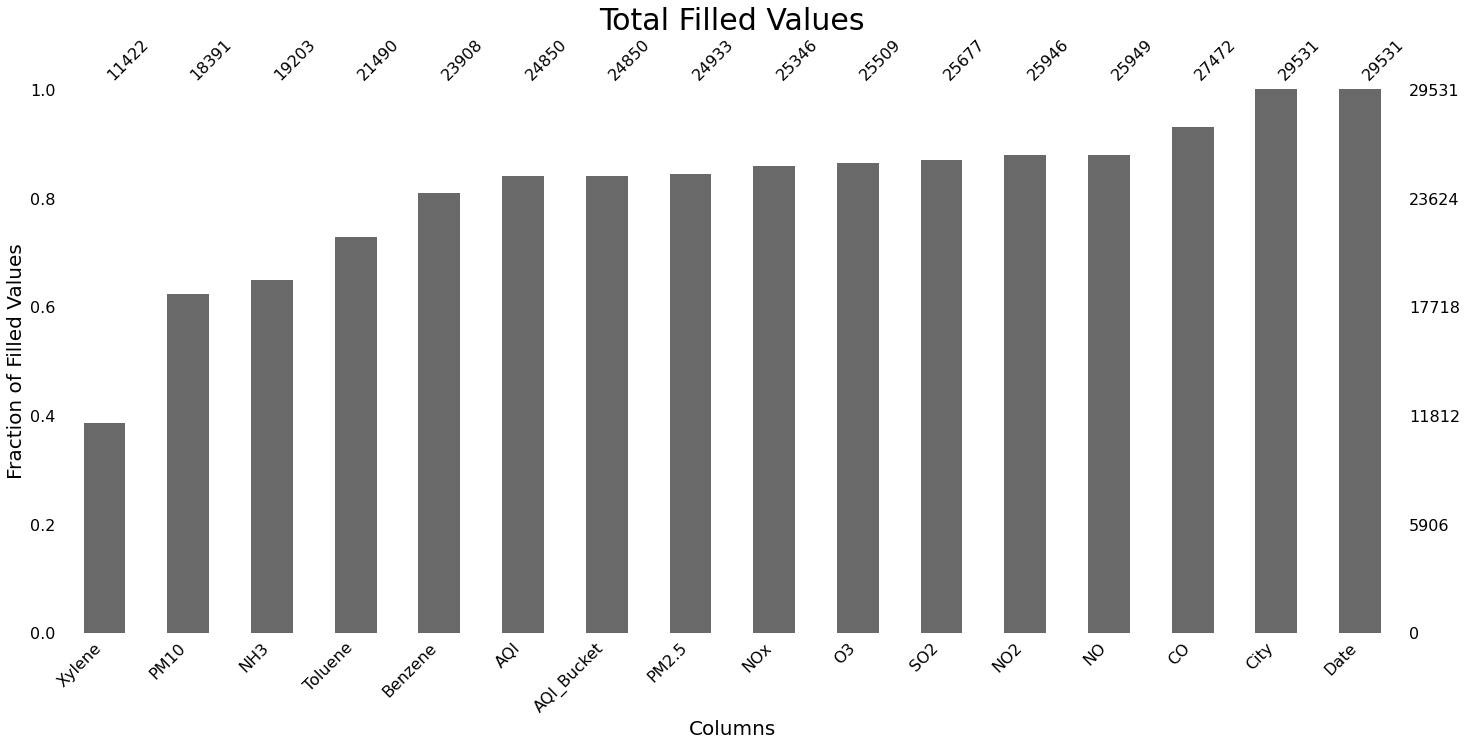

In [7]:
from importlib import reload
plt=reload(plt)
plt.figure(figsize=(10, 6))
plt.title('Total Filled Values',size=30)
plt.xlabel('Columns',size=20)
plt.ylabel('Fraction of Filled Values',size=20)
msno.bar(city_day,sort='ascending');

So we have lots of missing values for Xylene, NH3 and PM10
<br>
We donot have any missing Date and no missing value in city column
<br>
We can even ignore Xylene column if it does not affect much to our analysis

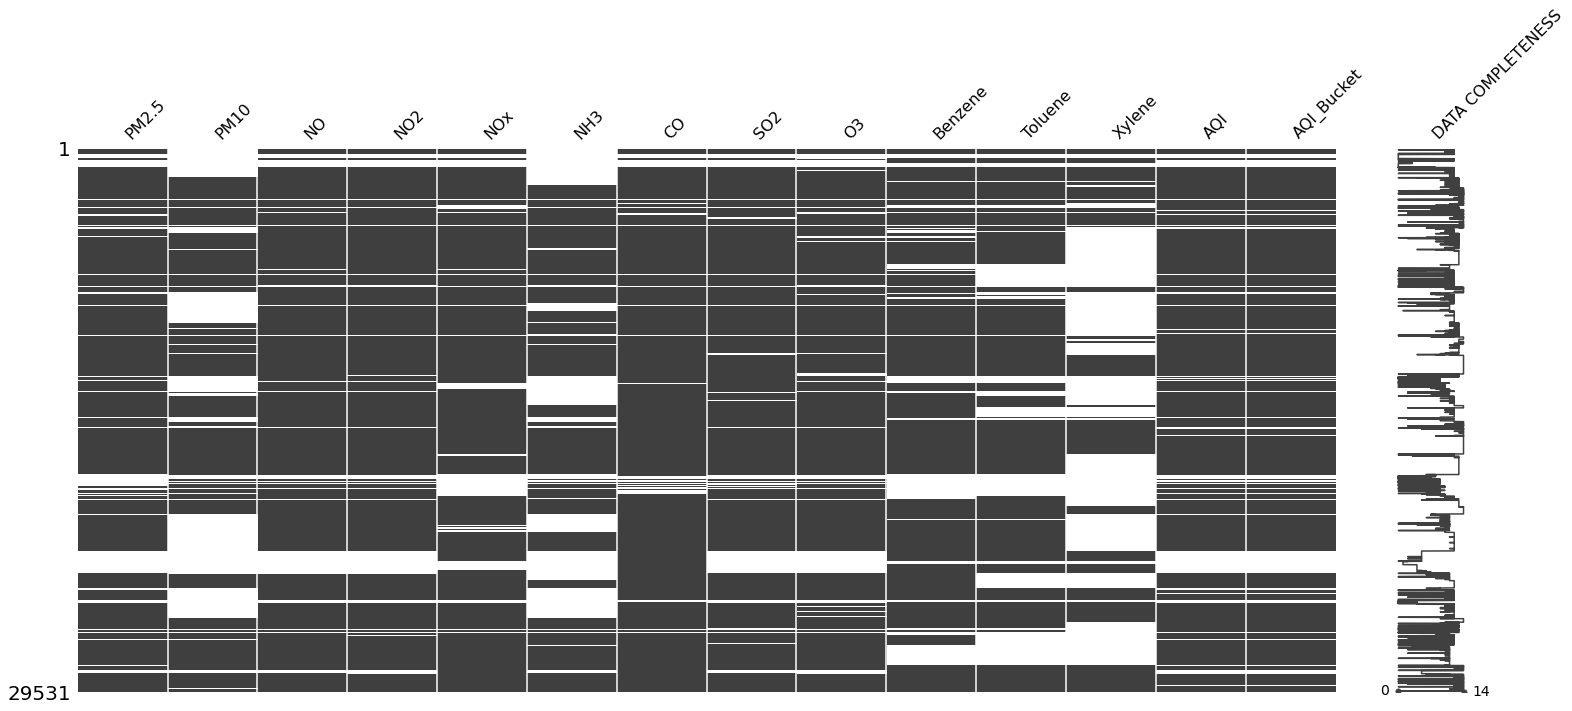

In [8]:
msno.matrix(city_day.drop(['City','Date'],axis=1),labels='columns');

Some rows are all Null for all pollutants<br>
Also we have huge chunks of white spaces for some pollutants. That is not a good thing. Filling missing values can be a challange now, may be some machine learning algorithm needs to be created to fill up these values to better accuracy. 

In [9]:
city_day.isna().any(axis=1).sum()/len(city_day)

0.788832074768887

So we have one or more missing values in most of the rows (around 79%)

## Just a Highlevel overall analysis

In [10]:
# converting the Date column to Datetime format and creating columns for year and month
city_day.Date=pd.to_datetime(city_day.Date)
city_day['Year']=pd.DatetimeIndex(city_day.Date).year
city_day['Month']=pd.DatetimeIndex(city_day.Date).month


### How much data do we have for each year
We do know that we have data for pollutant levels for each year but let's check for how many cities do we have data for each year. storing the data in different variables for all years will help us perform analysis bit more quickly.

In [11]:
for2015=city_day[city_day['Year']==2015]
for2016=city_day[city_day['Year']==2016]
for2017=city_day[city_day['Year']==2017]
for2018=city_day[city_day['Year']==2018]
for2019=city_day[city_day['Year']==2019]
for2020=city_day[city_day['Year']==2020]
print(len(city_day.City.unique()),len(for2015.City.unique()),len(for2016.City.unique()),
      len(for2017.City.unique()),len(for2018.City.unique()),len(for2019.City.unique()),
     len(for2020.City.unique()))

26 9 10 17 18 23 26


So we have pollution data for 9 cities for 2015, 10 cities for 2016, 17 cities for 2017, 18 cities for 2018, 23 cities for 2019 and 26 cities for 2020. Also in total we have data for 26 unique cities. 

### Overall Pollution Trend

> Visualising the overall AQI trend with help of scatterplot.<br>
We will get a unique dot for each date and overall pollution trend can be analysed

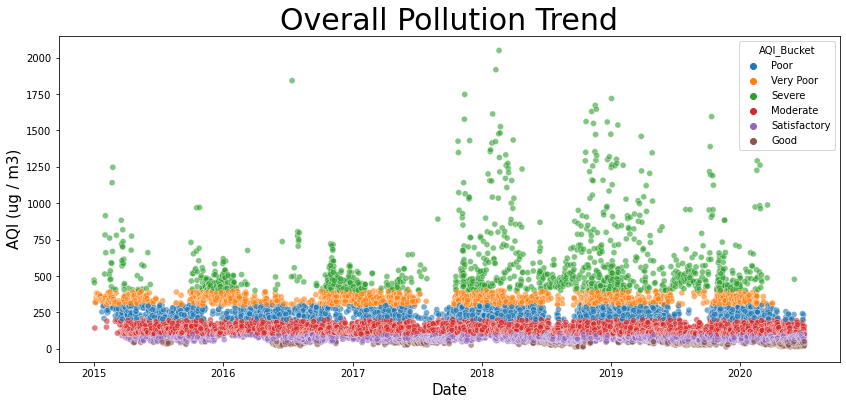

In [12]:

plt.figure(figsize=(14, 6))
fig=sns.scatterplot(x=city_day['Date'], y=city_day.AQI,hue=city_day['AQI_Bucket'],alpha=.6)
fig.axes.set_title("Overall Pollution Trend",fontsize=30)
fig.set_xlabel("Date",fontsize=15)
fig.set_ylabel("AQI (ug / m3)",fontsize=15)
plt.show();

From the above plot we can find that:
1. The pollution is incresing year after year.
2. For each year pollution is maximum in the starting and end of the year and minimum somewhere in the middle of the year
3. As the pollution level increases there is drastic change in day to day values of AQI
4. The pollution is quite less in the midlle of 2020 as compared to other years

In [13]:
city_day['Day']=pd.DatetimeIndex(city_day.Date).day
city_day['Date1']=city_day['Day'].astype(str)+"/"+city_day['Month'].astype(str)

### Pollution Trend year by year
> **Question 1 - Does 2020 lockdown affect Air Pollution Levels,If yes then how?**<br>
To answer the above question properly it would best to plot pollution values for all years as scatterplot animation frame which would help us see pollution trend for each year separately. Then we would compare those trends with trend in 2020.

In [14]:

fig=px.scatter(city_day,x="Date", y="AQI",
               animation_frame="Year", 
               color="AQI_Bucket",
               opacity=.85, title='Pollution Trend Year by Year'
              );
fig.update_layout(title_font_size=20)
fig.show()


From the above graphs we can infer that 
1. Due to missing values we may see huge standard deviation in data. At the same time it is difficult to say that we have outliers or unrealistic values in the data 
2. For 2015, lots of missing values for 1st and last quarter. Severe and Very Poor dots are almost negligible for middle quarters.
3. For 2016, we do have some severe dots in August that's exceptional. November and January are most polluted. Lots of missing values for winter months.
4. For 2017, graph shows severe values even in summers. Lots of missing data for 3rd quarter
5. For 2018, severe dots become more spread and good dots seem to hold lesser area as compared to previous years. Lots of missing values for third quarter
6. For 2019, trend is similar to that of 2018. We have more spread in severe dots also we have more good dots as well.
7. 2020 breaks the trend of rising severe, poor or very poor dots year after year. Rather there a significant increase in good and satisfactory dots as compared to 2019. May be it's effect of Lockdown, that we see a huge improvement in AQI values.
> **ANSWER -1 :** <br>
> Yes 2020 Lockdown seems to have strongly affected the air pollution trend. Year 2020 saw a huge decrease in AQI levels after lockdown. From the  7th inference it's clear that Pollution levels for 2020 are exceptional and the trend of rising pollution year by year got broken in 2020. There had been a significant increase in good and satisfactory dots.  

### Monthly Average for all pollutants for each year (line chart grid)
> **QUESTION - 2 : Is there any common pattern followed by most pollutants?**<br>
Plotting all graphs together to just have a look over common trends and similarities between different pollutant levels at different times of the year. So, defining a function which will plot graphs for pollutants provided in a form of list. The below function makes number of subplots based on years and pollutant count.

In [15]:
plt=reload(plt)
# Setting the background style with seaborn 
sns.set_style("whitegrid")
# Defining a function to recursively call all the pollutants of our dataframe
# and plot the graphs for different years
def yearly_trend(city_day_df,pollutants,years):
    # function takes the dataframe, pollutant names in a form of sereies, 
    # and years in a form of series
    
    # converting series to lists
    pollutants=list(pollutants)
    years=list(years)
    # making grid with help of plt.subplots with so that we have a number of row equal 
    #to number of pollutants and number of years as number of columns
    fig,axes=plt.subplots(len(pollutants),len(years), figsize=(25,25))
    
    for i in years:
        col=years.index(i)
        # separating out results for that year with .xs method for multi indexes
        df1=city_day_df.xs(i)
        for j in pollutants:  
            row=pollutants.index(j)
            axes[row,col].set_title(f'{j} in {i}',size=15)
            axes[row,col].plot(df1[j])
            # if i want to type a few lines below every chart like max and min value
    plt.suptitle('Monthly Trend for every Year for Each Pollutant',size=40)
    plt.tight_layout(pad=2)        
            

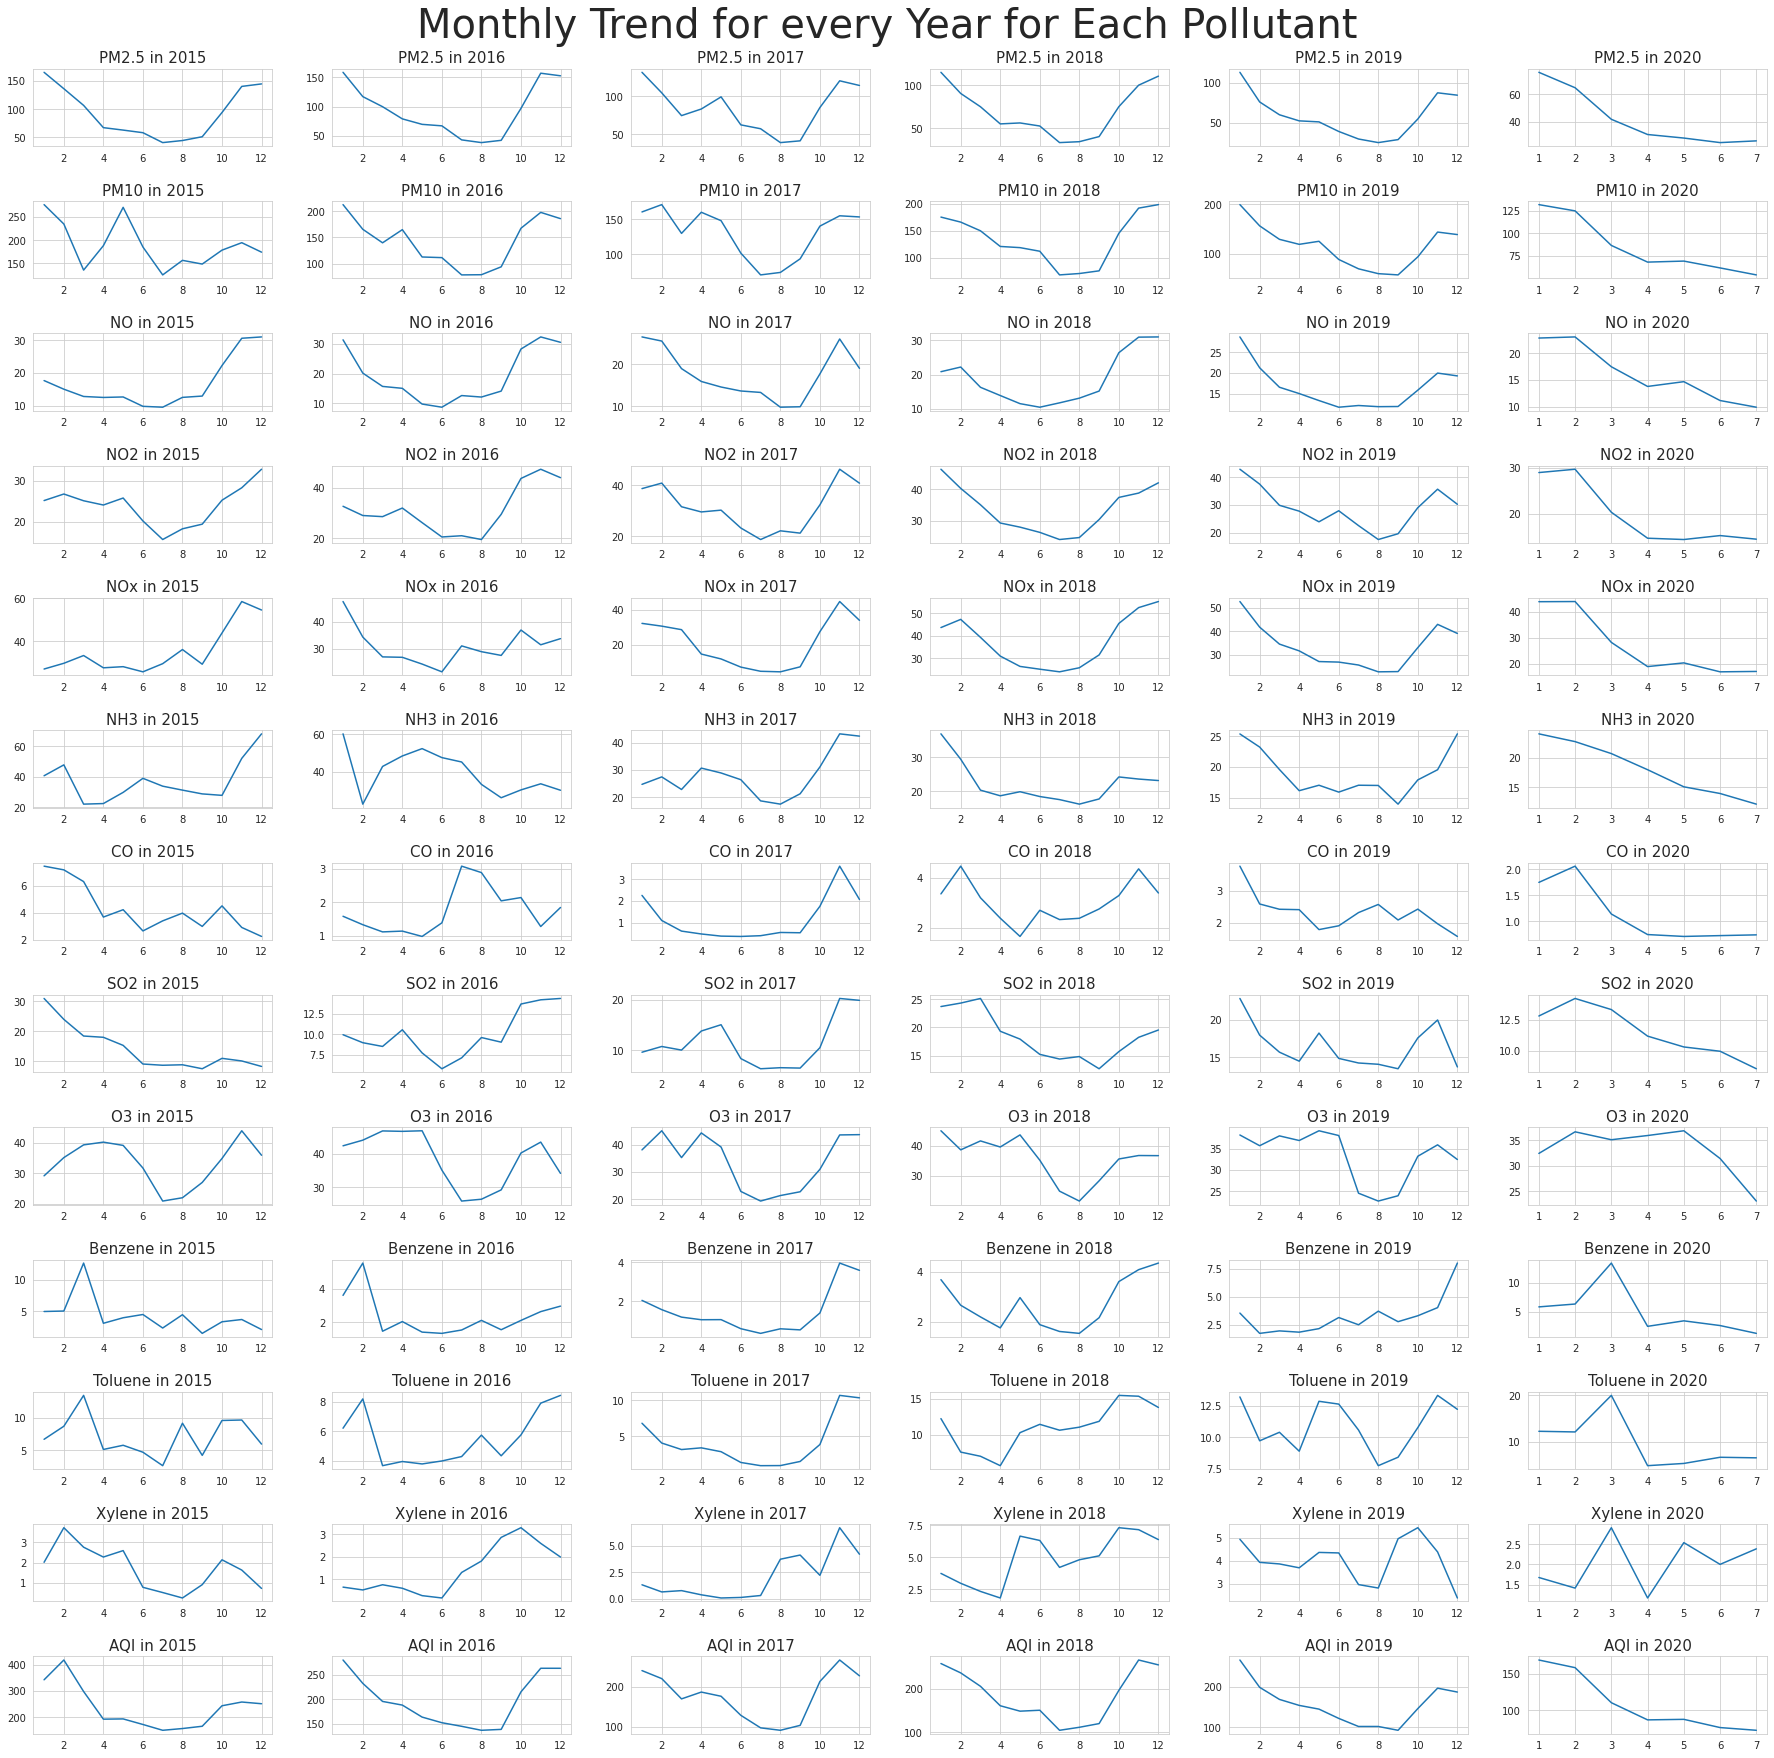

In [16]:
# getting pollutants
pollutants=city_day.columns[2:-5]
# getting all years
years=city_day['Year'].unique()
# grouping the dataframe by Year and month with mean as aggregation parameter
df=city_day.groupby(['Year','Month']).mean()
# calling the defined function, providing grouped dataframe and pollutnts and years as parameters
yearly_trend(df,pollutants,years)


> **ANSWER -2 :** <br>
>From above plots, it's visible that:
>1. Mostly all pollutants follow a U curve over span of each year. Minima is most common between July to September.
>2. Only in a few graphs there are exceptional huge peaks in the middle.
>3. Toluene and Xylene have bit exceptional trends. It may be because of availability of lesser data for these columns. We can also infer that these two columns, especially Xylene have very less effect on AQI.


# Pollution Data Analysis


## Overall AQI and Comparing Cities

### Overall AQI Value Counts.
Let's see how many time we get an AQI bucket in each month (grouping by Month) in period of 5 years (2015-2019). We will not be considering 2020 as we only have data for 1st half of 2020.

In [17]:
df=city_day[city_day['Year']!=2020]
fig = px.histogram(df, 
                   x="Month", 
                   color="AQI_Bucket", 
                   marginal="violin", 
                  # barmode='group',
                   hover_data=df.columns,title='Monthly Count of AQI Bucket')

fig.show()

From above graph we can see that on overall basis,
- Months of July,August and September have best Air Quality.
- Whereas in winters (i.e. November till January) we have Poor or worse Air Quality for almost 45% of the days.
We have most missing values for January the count of missing values increas with increase in month number. So our analysis or comparison may not be too accurate as we have lots and lots of missing values.

### Comparing Cities based on mean AQI values over whole span.
> **Question 3 - : Which are the most and least polluted cities?**<br>
Plotting a bar graph sounds a good choise for this analysis. We could find the cities with highest,lowest and moderate pollution.

In [18]:
dfx=city_day.groupby('City').mean()
dfx=dfx.sort_values('AQI',ascending=False)
dfx.reset_index(inplace=True)
plt.figure(figsize=(6, 6));
fig=px.bar(dfx,x='City',y='AQI',color='AQI');

fig.update_layout(coloraxis=dict(colorscale='reds'),plot_bgcolor='White');
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=40, tickcolor='crimson', ticklen=8,title_text="Cities");
fig.update_yaxes(title_text="ug / m3",);
fig.update_yaxes(title_text="ug / m3",);
fig.show();

<Figure size 432x432 with 0 Axes>

> **ANSWER -3:** <br>
> - Most polluted cities are Ahemdabad, Delhi, Patna, Gurugram and Lucknow.
> - Least Polluted cities are Aizwal, Shilong, Coimbtore and Thiruvananthapuram

### Hourly Pollution Trend
>**QUESTION - 4 : What time of day can we generally expect to have best or most poor air quality ?**<br>
> To answer this question, it would be good to have a visualization in form of a interactive Bar Plot Animation Frame.<br>
> We will need to read city_hour file then group the data by month and time. Then plot a bar graph with animation frame as Month. 

In [19]:
city_hour=pd.read_csv('../input/air-quality-data-in-india/city_hour.csv')
city_hour['Datetime']=pd.to_datetime(city_hour['Datetime'])
city_hour['Month']=pd.DatetimeIndex(city_hour.Datetime).month
city_hour['time']=city_hour['Datetime'].dt.time
dfx=city_hour.groupby(['Month','time']).mean()
dfx.reset_index(inplace=True)


In [20]:
fig = px.bar(dfx,
            x="time",
            y="AQI",
            title = "Hourly Trend of Pollution",
            barmode='group',
            animation_frame="Month",  
            )
fig.update_xaxes(title_text="Time of Day")
fig.update_yaxes(title_text="AQI (ug/m3)")
fig.show() 

>**ANSWER - 4:** <br>
>**For Winters (Octber to February)** - <br>
 Pollution is highest during night times. It follows a mild U curve. The AQI starts decreasing with rise of day, remains stable for most of day time, lowest at around 6-7 pm, then again rises gradually to higher values.<br>
 >**For Summers(April to September)** -<br>
 The distribution remains quite stable throughout the 24 hours. Trend follows very mild variations similar to a sine wave. 

## Monthly Trend every year for each pollutant
Plotting Box plots for each pollutant to show its monthly variation<br>
Making a general function to get idea of monthly variation or trends over years for any particular pollutant

In [21]:
def yearly_trend_pollutant(city_day_df,pollutant):
    
    # getting list of years from the DataFrame
    years=list(city_day_df['Year'].unique())  
        
    #ploting box plots as a grid of 2*3
    fig,axes=plt.subplots(2,3, figsize=(16,8))
    for j in years:
        col=years.index(j)
        # having first three years' plot in 1st row and next three years in 2nd row 
        row=1 if col>2 else 0
        col=col%3
        df1=city_day_df[city_day_df['Year']==j]
        axes[row,col].set_title(f'{pollutant} in {j}',color='green')
        sns.boxplot(x=df1.Month,y=df1[pollutant],ax=axes[row,col])
        axes[row,col].set_xlabel('')
        axes[row,col].set_ylabel('')
    # adding a title to whole grid    
    plt.suptitle(f"Monthly trend for {pollutant} for all years",size=20,color='Blue')    
        
    

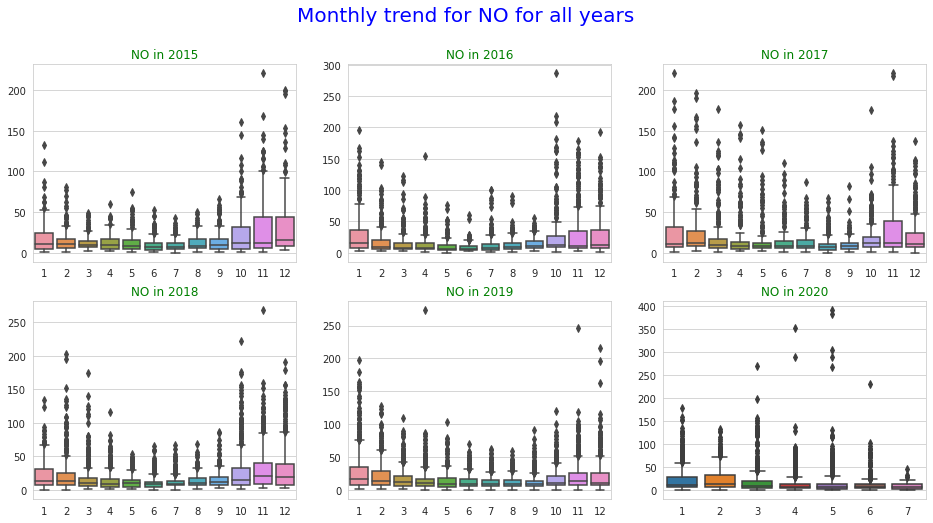

In [22]:
plt=reload(plt)
yearly_trend_pollutant(city_day,'NO') 

From above plot we can say (about NO trend):
1. The outliers and standard deviations are maximum during winter months
2. There is huge daily variation in Air quality in winter months 
<br>
<b>But above conclusions may not hold true if the effect is due to missing values<b>
3. The results for mid year months are quite precise with not big outliers and lesser standard deviations.
4. The trend for 2020 is bit exceptional.
<br>
    <br>
    <b> Different conclusions could be formulated for different pollutants.</b>

## Heat map for a monthly pollutant trend for all cities in a particular year

Defining a genral function that would help monthly values of pollutant for any city and year

In [23]:
def monthly_pollution_city(city_day,yearr,pollutant):
    # separting data for the year provided
    dfx=city_day[city_day['Year']==yearr]
    # now grouping data by month and city 
    dfx=dfx.groupby(["Month","City"]).mean()
    # resetting index
    dfx.reset_index(inplace=True)
    # Making a pivot table with Pollutant and Month and City as columns
    df1=dfx.pivot("Month","City",f"{pollutant}")
    # dropping rows which have all values as null so that we donot get error
    df1=df1.dropna(axis=1, how='all')
    
    for city in df1.columns:
        # filling none values with mean of the column
        df1[city]=df1[city].fillna(np.mean(df1[city]))
        df1[city]=df1[city].astype('int32')     

    plt.figure(figsize=(16,4))
    # Setting title for the graph
    plt.title(f'{pollutant} for {yearr}',y=1.05)
    sns.heatmap(df1,fmt="d",annot=True,cmap='Blues');

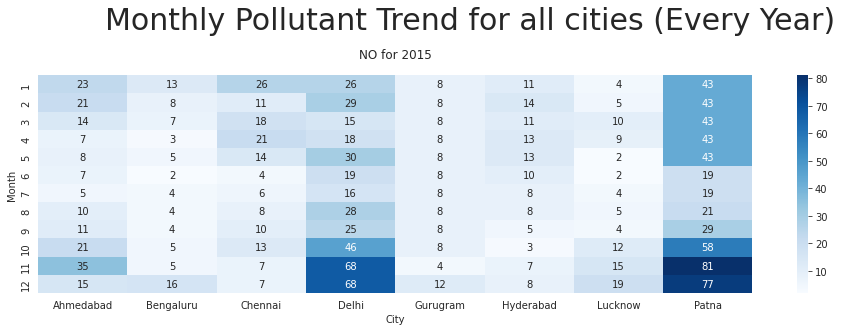

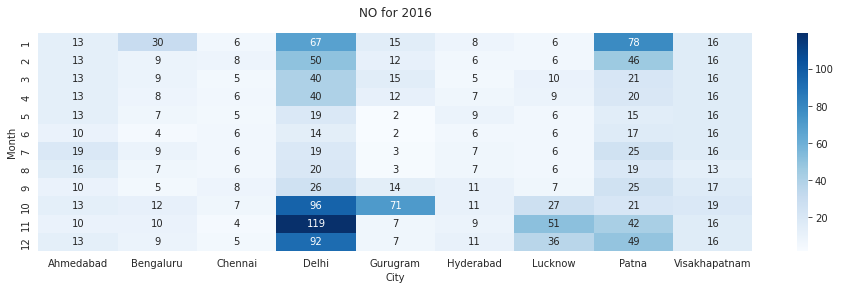

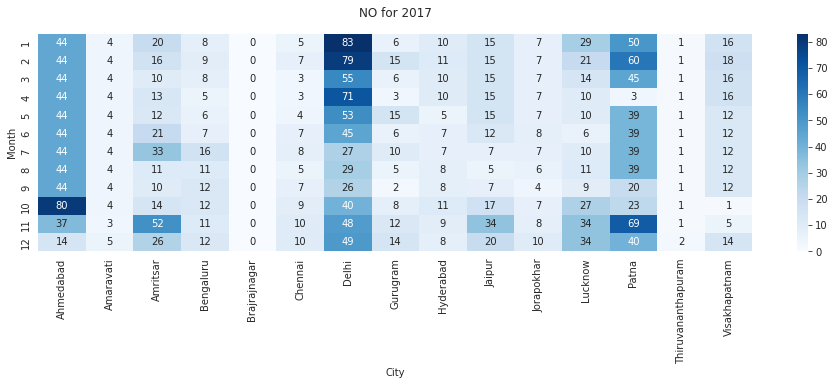

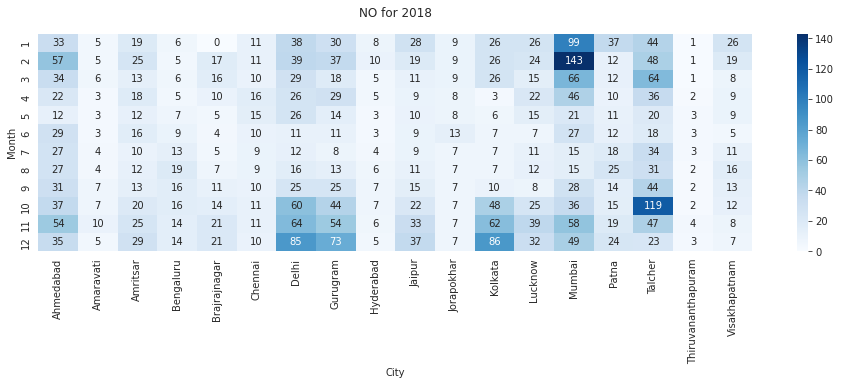

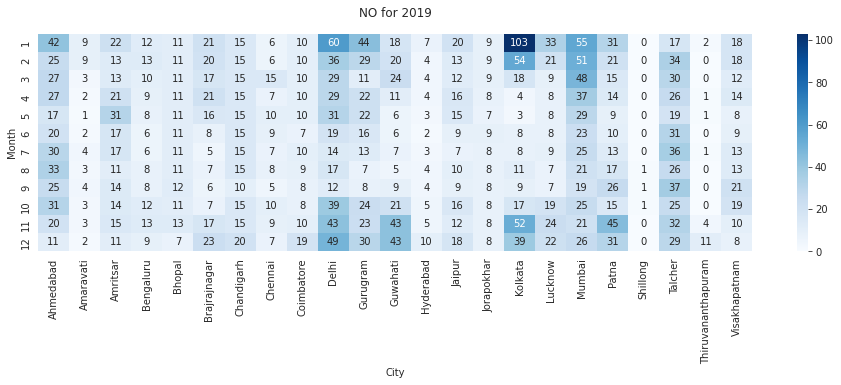

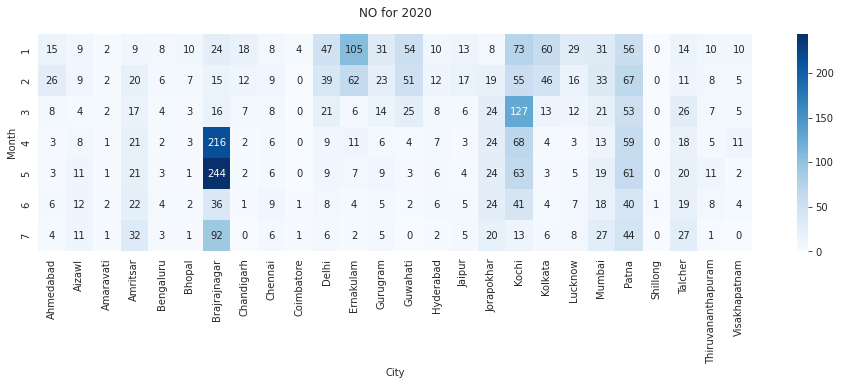

In [24]:
# calling the above function for all years

monthly_pollution_city(city_day,2015,'NO'); 
plt.suptitle("Monthly Pollutant Trend for all cities (Every Year)",size=30,y=1.12);
monthly_pollution_city(city_day,2016,'NO');
monthly_pollution_city(city_day,2017,'NO');
monthly_pollution_city(city_day,2018,'NO');
monthly_pollution_city(city_day,2019,'NO');
monthly_pollution_city(city_day,2020,'NO');


Cities with highest NO Pollution 
- 2015: Delhi, Patna, Ahemdabad and Chennai
- 2016: Bengaluru, Delhi, Lucknow, Patna
- 2017: Delhi, Patna, Ahemdabad, Lucknow, Amritsar, Gurugram
- 2018: Delhi, Patna, Ahemdabad, Lucknow, Gurugram, Kolkata, Talcher, Mumbai
- 2020: Brajrajnagar, Kochi, Patna, Emakulam
- Overall There huge decrease in NO pollutant in 2020
- NO mostly follows a "U" curve. Hieghest in winters and lowest in summers.

### Correlation between AQI and other pollutant values
Plotting correlation plot with help of .corr() method, sorting the values and printing the dataframe

In [25]:
plt=reload(plt)

corr=city_day[city_day.columns[:-4]].corr()['AQI'].sort_values(ascending=False).to_frame()[1:]
corr.style.background_gradient(cmap='Reds')



### Plotting particular Pollutant levels for different years and cities
Ploting a muti-line chart for each pollutant with colors as years 

> Defining a generalized function

In [26]:
def pollutant_line_all_years(city_day,pollutant):
    # Grouping by year and month
    df=city_day.groupby(['Year','Month']).mean()
    # separating out pollutant data for all years and naming the series as year itself
    for_2015=df.xs(2015)[pollutant]
    for_2015.name='2015'

    for_2016=df.xs(2016)[pollutant]
    for_2016.name='2016'
    for_2017=df.xs(2017)[pollutant]
    for_2017.name='2017'

    for_2018=df.xs(2018)[pollutant]
    for_2018.name='2018'
    for_2019=df.xs(2019)[pollutant]
    for_2019.name='2019'
    # concatenating all series into a dataframe
    final_df=pd.concat([for_2015,for_2016,for_2017,for_2018,for_2019],axis=1)

    # finally plotting the line graph with plotly
    fig=px.line(final_df, title=f"Yearly {pollutant} Trend")
    fig.update_yaxes(title='ug/m3')
    return fig.show()

In [27]:
pollutant_line_all_years(city_day,'NO') # Form an animation frame to show treand of each pollutant

NO follows almost same trend for all years i.e. Highest in months of November to January and Lowest in months of June to September.

# Finding Relations between Demography and Pollution

## Waht is Demography:
Demography is the study of demographics, the social characteristics and statistics of a human population. This study of the size, age structures, and economics of different populations can be used for a variety of purposes. [Know More](https://www.investopedia.com/terms/d/demographics.asp)

## Introduction to Demography Dataset
We have data in form of csv from 2011 census for Indian Cities. Though this data is older and not of same dates or years as in our main dataset, still it can give us probably fine results. However, the results of this analysis may not the be that perfect.

## Treemap for different demographic Parameters with color as AQI
> **QUESTION - 5 : How the Air Quality is affected by different Demographic parameters?**<br>
> Grouping the main dataset by year and city with aggregation as mean. Reading Demography data file and merging it with main dataframe.

In [28]:
#grouping pollution by year and city
city_year_city=city_day.groupby(['Year','City']).mean()# we should take avg for a month and then avg for year

# reading demography file
demo_df=pd.read_csv("../input/top-500-indian-cities/cities_r2.csv")
# renaming columns to match with Pollution Dataframe
demo_df.rename(columns={'name_of_city': 'City','population_total':'Population'},inplace=True)
demo_df.City=demo_df.City.apply(lambda x:x.strip())

In [33]:
def demography_pollutant_relation(city_year_city,demo_df,yearr,pollutant,demo_col):
    df_year=city_year_city.xs(yearr) # segregation by year
    df_year.reset_index(inplace=True) # ressting index
    df_year=pd.merge(df_year,demo_df,on='City') # merging the Dataframes
    fig=px.treemap(df_year,path=[px.Constant("India"),'City'],values=f'{demo_col}',color=f'{pollutant}'
              ,color_continuous_scale='RdBu'
                  )
    fig.update_layout(title=f"For {yearr} - {demo_col}") # adding title for graph
    return fig.show()

Checking what data do we have for Demography.

In [34]:
demo_df.columns

Index(['City', 'state_code', 'state_name', 'dist_code', 'Population',
       'population_male', 'population_female', '0-6_population_total',
       '0-6_population_male', '0-6_population_female', 'literates_total',
       'literates_male', 'literates_female', 'sex_ratio', 'child_sex_ratio',
       'effective_literacy_rate_total', 'effective_literacy_rate_male',
       'effective_literacy_rate_female', 'location', 'total_graduates',
       'male_graduates', 'female_graduates', 'Percent_Total_Graduates'],
      dtype='object')

Selecting certain columns with which it would be meaningful to compare with Pollution.
1. Sex Ratio: The sex ratio (or gender ratio) is the ratio of females to males in a population.
2. Effective Literacy Rate: 
3. Total Graduates:
4. Effective Literacy Rate Male:
5. Effective Literacy Rate Female:<br>
Based on data we have, it sounds good to have Percentage of total literates who are graduates and compare different location on it's basis as well.

In [35]:
demo_df['Percent_Total_Graduates']=demo_df['total_graduates']/demo_df['literates_total']

In [36]:
for i in ['sex_ratio','effective_literacy_rate_total','Percent_Total_Graduates','effective_literacy_rate_female','effective_literacy_rate_male']:
    # keeping year constant and changing columns
    demography_pollutant_relation(city_year_city,demo_df,2019,'AQI',i)

> **ANSWER 5:** <br>
> We could get following insights
>1. Lower the literacy rate more the pollution
>2. Lower the sex ratio more the pollution
>3. Delhi shows most exceptional results, may be because of it's importance, tourism, population density, industrialization, etc.
>4. More the number of literate Graduates more is the pollution. This looks strange but this is the result we are getting from this data
><br> <b> Probably We could find useful insights if we were given population density instead of population.</b>
><br>
 

# Relation between Weather and Air Pollution

## Introduction to Weather Datasets
Lets check what we have in our weather data files. Lets open up file for Delhi.

In [37]:
Delhi_weather=pd.read_csv(f'../input/historical-weather-data-for-indian-cities/delhi.csv')

In [38]:
Delhi_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

So we have a good dataset with 25 columns and about 97000 rows. We donot have any missing value, that's really great. We have date in object format, so we need to convert it to datetime format.

In [39]:
Delhi_weather.describe()

maxtempC      mintempC  totalSnow_cm       sunHour       uvIndex  \
count  96432.000000  96432.000000       96432.0  96432.000000  96432.000000   
mean      32.681434     21.505475           0.0     11.213489      6.736685   
std        7.479931      8.245626           0.0      2.155831      1.656212   
min       12.000000      1.000000           0.0      3.800000      3.000000   
25%       26.000000     14.000000           0.0      8.700000      5.000000   
50%       34.000000     23.000000           0.0     11.600000      7.000000   
75%       38.000000     28.000000           0.0     13.200000      8.000000   
max       52.000000     43.000000           0.0     14.000000     11.000000   

          uvIndex.1  moon_illumination     DewPointC    FeelsLikeC  \
count  96432.000000       96432.000000  96432.000000  96432.000000   
mean       4.390316          46.094077     12.170929     30.486270   
std        3.372834          31.249725      8.049545      9.853813   
min        1.000000           0.000000    -22.000000      4.000000   
25%        1.000000          18.000000      6.000000     23.000000   
50%        5.000000          46.000000     11.000000     31.000000   
75%        8.000000          73.000000     20.000000     38.000000   
max       11.000000         100.000000     30.000000     65.000000   

         HeatIndexC    WindChillC  WindGustKmph    cloudcover      humidity  \
count  96432.000000  96432.000000  96432.000000  96432.000000  96432.000000   
mean      30.608543     29.072569     11.983501     14.485119     41.323254   
std        9.708888      8.581811      6.182597     20.518663     21.351832   
min        5.000000      4.000000      0.000000      0.000000      2.000000   
25%       24.000000     23.000000      7.000000      0.000000     24.000000   
50%       31.000000     30.000000     11.000000      5.000000     38.000000   
75%       38.000000     35.000000     16.000000     21.000000     56.000000   
max       65.000000     54.000000     72.000000    100.000000    100.000000   

           precipMM      pressure         tempC    visibility  winddirDegree  \
count  96432.000000  96432.000000  96432.000000  96432.000000   96432.000000   
mean       0.032072   1006.972333     26.672484      9.913307     214.948689   
std        0.287923      7.789316      8.917470      0.992465     101.676151   
min        0.000000    987.000000      0.000000      0.000000       0.000000   
25%        0.000000   1000.000000     20.000000     10.000000     116.000000   
50%        0.000000   1007.000000     28.000000     10.000000     259.000000   
75%        0.000000   1014.000000     33.000000     10.000000     303.000000   
max       17.600000   1025.000000     51.000000     20.000000     360.000000   

       windspeedKmph  
count   96432.000000  
mean        8.795151  
std         4.329033  
min         0.000000  
25%         6.000000  
50%         8.000000  
75%        11.000000  
max        44.000000

1. The values are quite well distributed for almost all columns as standard deviations are not too high and there is not muc difference between range of values for each quartile. 
2. It seems all values in totalSnow_cm column are 0. If that's the case we can drop this column. But Let's check.

In [40]:
Delhi_weather['totalSnow_cm'].unique()

array([0.])

In [41]:
# So Delhi has got no snowfall in the duration for which dataset is prepared
# Let's remove this column
Delhi_weather.drop('totalSnow_cm',axis=1,inplace=True)

Let's check how many cities do we have common in our pollution dataset and weather data files.

In [42]:
# lets import os (operating systems) module in python
import os
# getting all file names in the folder in a form of list
cities_list=os.listdir('../input/historical-weather-data-for-indian-cities')
# stripping the .csv extension and changing the elements of this list to match the format
# in which city names are provided in our pollution dataset
for i in range(len(cities_list)):
    cities_list[i]=cities_list[i].strip('.csv')
    if cities_list[i]=='bombay':
        cities_list[i]='mumbai'
    cities_list[i]=cities_list[i].capitalize()
     
# checking which cities do we have in common
for i in cities_list: 
    if i in city_day.City.unique():
       print(i) 

Jaipur
Bengaluru
Delhi
Mumbai
Hyderabad


We have 5 common cities and we can perform analysis on these five only. So let's read all these files. It would be better to define a function to do some basic operations on files before saving them into variables. The operations would include capitalizing city name, adding a city column, converting date into Datetime format, adding Year, Month and Day columns and grouping up whole data by Year month and day as we donot want hourly data, we require day by day data.

In [43]:
def basic_operations_on_weather_file(City):
    try:
        City_weather=pd.read_csv(f'../input/historical-weather-data-for-indian-cities/{City}.csv')
    except:
        # If file is not found raise exeption and return none
        raise Exception ("File Not Found")
        return
    
    City=City.capitalize() # this makes first letter of the string as uppercase
    City_weather['City']=f'{City}' # Creating a city column
    City_weather['Date']=pd.to_datetime(City_weather['date_time'])
    City_weather['Year']=pd.DatetimeIndex(City_weather['Date']).year
    City_weather['Month']=pd.DatetimeIndex(City_weather['Date']).month
    City_weather['Day']=pd.DatetimeIndex(City_weather['Date']).day
    City_weather=City_weather.groupby(['Year','Month','Day']).mean()
    return City_weather

In [44]:
# Reading all the required files
Delhi_weather=basic_operations_on_weather_file('delhi')
Jaipur_weather=basic_operations_on_weather_file('jaipur')
Bengaluru_weather=basic_operations_on_weather_file('bengaluru')
Hyderabad_weather=basic_operations_on_weather_file('hyderabad')
Mumbai_weather=basic_operations_on_weather_file('bombay')

Now we need to make both City_Weather and Pollution dataframe compatible so that we can merge them into one Dataframe. So, filtering data for particular city, adding a Day column and grouping by Year, Month and Day. It would be better to define a function for doing the same.

In [45]:
def basic_operations_city_day_city(city_day,City):
    city_day_city=city_day[city_day.City==f'{City}'] # filtering data by city
    city_day_city['Day']=pd.DatetimeIndex(city_day_city.Date).day # creating a day column
    city_day_city=city_day_city.groupby(['Year','Month','Day']).mean() # grouping 
    return city_day_city

### Significance of Different Columns in weather files
1. Temperature : Temperature is a physical quantity that expresses quantitatively the perceptions of hotness and coldness. More the temperature hotter the place.

2. Humidity :  Humidity is the amount of water vapor in the air. If there is a lot of water vapor in the air, the humidity will be high. The higher the humidity, the wetter it feels outside.
3. Windspeed : Windspeed is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature. Wind speed is now commonly measured with an anemometer. Wind speed affects weather forecasting, aviation and maritime operations, construction projects, growth and metabolism rate of many plant species, and has countless other implications.

4. Atmospheric Pressure : In most circumstances, atmospheric pressure is closely approximated by the hydrostatic pressure caused by the weight of air above the measurement point. As elevation increases, there is less overlying atmospheric mass, so atmospheric pressure decreases with increasing elevation. Because the atmosphere is thin relative to the Earth's radius—especially the dense atmospheric layer at low altitudes.

5. Cloud Cover: Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds on average when observed from a particular location.Okta is the usual unit for measurement of the cloud cover. The cloud cover is correlated to the sunshine duration as the least cloudy locales are the sunniest ones while the cloudiest areas are the least sunny places, as clouds can block sunlight, especially on sunrise and sunset where sunlight is already limited.

6. Precipitation: Precipitation is any product of the condensation of atmospheric water vapor that falls under gravitational pull from clouds.It can be of any form rain, hail, snow, drizzle,etc.
7. Sun Hour: We observe the sun throughout the day from every part of the earth, but it isn't all at the same intensity. To make it a useful unit, scientist and engineers have defined it to be something standard. A “Sun-Hour” is “1000 watts of energy shining on 1 square meter of surface for 1 hour”
8. Uv Index (UVI) : UVI is a measure of the level of UV radiation. The values of the index range from zero upward - the higher the UVI, the greater the potential for damage to the skin and eye, and the less time it takes for harm to occur. The UVI is an important vehicle to alert people about the need to use sun protection.



## Analysis for Delhi
> **QUESTION - 6 :How are wind speed and humidity related to Air Quality?** <br> 
> **QUESTION - 7 : Why is Air Quality better in summers than Winters?**<br>
>To answer the above questions I would good to plot different graphs to find  relation between
>1. Humidity and AQI
>2. Humidity, Wind Speed and AQI
>3. Temperature and AQI
>4. Pressure and AQI

In [46]:
Delhi_Pollution= basic_operations_city_day_city(city_day,'Delhi')

As soon as we have grouped the data we would have lost the object columns. Let's merge both the data frames and create some important categorical columns like AQI_Bucket and humidity_category
![](https://w.ndtvimg.com/sites/3/2019/12/18122812/air_pollution_standards_cpcb.png)

In [47]:
def merging_Dataframes_for_weather(city_day_city,city_weather):
    merged_df=pd.merge(city_day_city,city_weather, left_index=True, right_index=True)
    # Creating AQI_Bucket column and assigning it values based on
    #the data we got from online sources.
    
    merged_df['AQI_Bucket']=merged_df['AQI']//50
    merged_df.loc[merged_df["AQI_Bucket"] >7, "AQI_Bucket"]='Severe'
    merged_df.loc[merged_df["AQI_Bucket"] ==0, "AQI_Bucket"] = 'Good'
    merged_df.loc[merged_df["AQI_Bucket"] ==1, "AQI_Bucket"]='Satisfactory'
    merged_df.loc[merged_df["AQI_Bucket"] ==2, "AQI_Bucket"]='Moderate'
    merged_df.loc[merged_df["AQI_Bucket"] ==3, "AQI_Bucket"]='Moderate'
    merged_df.loc[merged_df["AQI_Bucket"] ==4, "AQI_Bucket"]='Poor'
    merged_df.loc[merged_df["AQI_Bucket"] ==5, "AQI_Bucket"]='Poor'
    merged_df.loc[merged_df["AQI_Bucket"] ==6, "AQI_Bucket"]='Very Poor'
    merged_df.loc[merged_df["AQI_Bucket"] ==7, "AQI_Bucket"]='Very Poor'
    # Creating a column "humidity_catergory" and asigning values based on most online sources
    merged_df['humidity_category']='high'
    merged_df.loc[merged_df["humidity"] <50, "humidity_category"] = 'moderate'
    merged_df.loc[merged_df["humidity"] <20, "humidity_category"] = 'low'
    # droping rows with missing AQI_Bucket or AQI  values
    merged_df = merged_df.dropna(subset=['AQI_Bucket'])
    # resetting index
    merged_df.reset_index(inplace=True)
    # creating a date column from Year, Month and Day columns
    merged_df['Date']=pd.to_datetime(merged_df[['Year', 'Month', 'Day']])
    #returning final dataframe
    return merged_df

In [48]:
merged_df_Delhi=merging_Dataframes_for_weather(Delhi_Pollution,Delhi_weather)

In [49]:
# Plotting a Polar Plot to visualize relation between humidity and AQI
fig = px.bar_polar(merged_df_Delhi, 
                    r="AQI_Bucket",#uvIndex
                    theta="humidity_category", 
                    color="AQI_Bucket",#AQI_Bucket
                   color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",title='AQI v/s Humidity')
fig.show()


It's clear from the above graph better air quality can mostly be found on higher humidity days<br> <br>
Now plotting different graphs to find relations with Windspeed, Temperature, Pressure and Precipitation

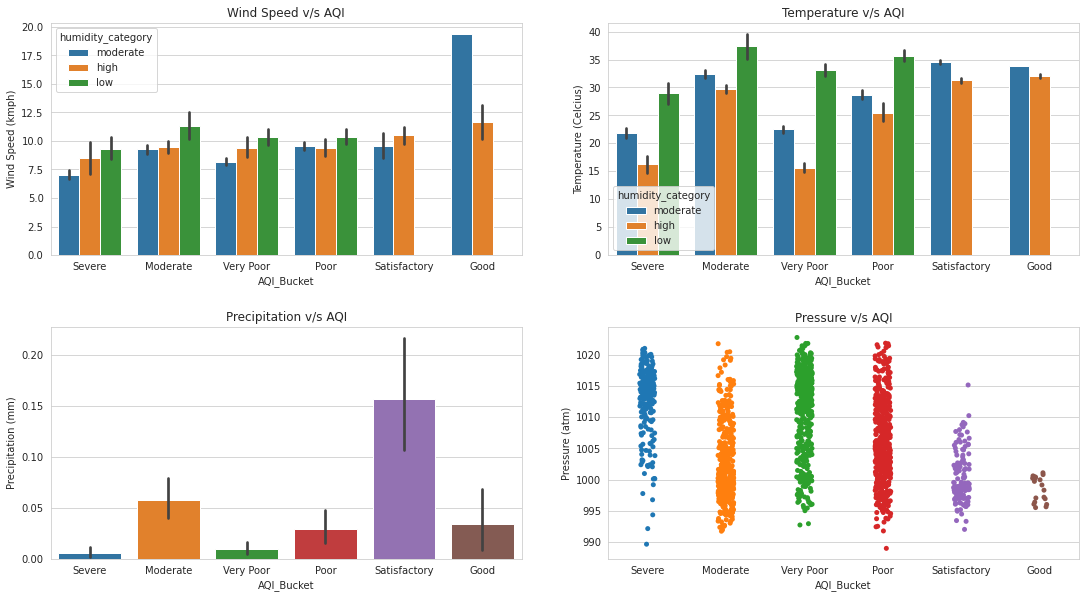

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.barplot(data=merged_df_Delhi, 
             y="windspeedKmph", 
             x="AQI_Bucket", 
             hue="humidity_category",
            ax=axes[0,0]
             );
sns.barplot(data=merged_df_Delhi, 
             y="tempC", 
             x="AQI_Bucket", 
             hue="humidity_category",
            ax=axes[0,1]
             );
sns.stripplot(data=merged_df_Delhi, 
             y="pressure", 
             x="AQI_Bucket", 
            #hue="humidity_category",
            ax=axes[1,1]
             );
sns.barplot(data=merged_df_Delhi, 
             y="precipMM", 
             x="AQI_Bucket", 
           #  hue="humidity_category",
            ax=axes[1,0]
             );
plt.tight_layout(pad=4) 
axes[0,0].set_title("Wind Speed v/s AQI");
axes[0,0].set_ylabel("Wind Speed (kmph)")
axes[0,1].set_title("Temperature v/s AQI");
axes[0,1].set_ylabel("Temperature (Celcius)")
axes[1,0].set_title("Precipitation v/s AQI");
axes[1,0].set_ylabel("Precipitation (mm)")
axes[1,1].set_title("Pressure v/s AQI");
axes[1,1].set_ylabel("Pressure (atm)");

So, For Delhi, 
- Lower the windspeed lower is the air quality
- Good and satisfactory Air quality is only observed during humidity being moderate or high that too with high windspeeds
- High humidity accompanied by moderate temperature (between 30-35 Degree C) has better air quality
- Better air quality is found on days with higher precipitation.
- Lower the pressure better the air quality
> **ANSWER 6:**<br>
> AQI is seems to be directly proportional to both Wind Speed and Humidity. So we can expect best air quality when both of these parameters have high values. For Delhi,Highly humid and windy days have mostly witnessed good or satisfactory Air Quality <br><br>
> **ANSWER 7:**<br>
> Good or satisfactory records of AQI have only be found neat temperatures of about 35 Degree Celcius and during low pressure days. <br>
> Both these conditions are satisfied during Summers only. Also answer to this question is well answered at ["How weather Affects Air Quality"](https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality)

> **QUESTION - 8 : If number of sun hours for a day are forecasted to be 8, what kind of air Quality can we expect?**<br>
 Plotting a Density plot to find relations of Air Pollution with Sun Hour and  Cloud Cover

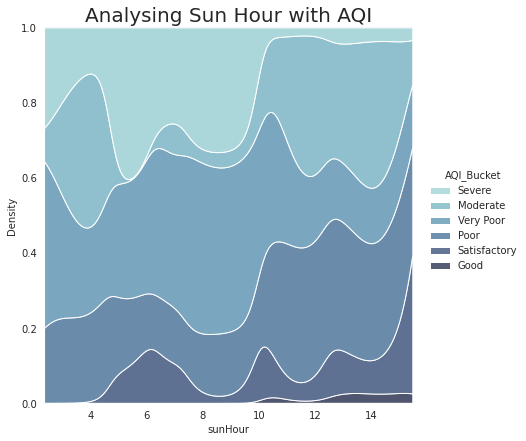

In [51]:
sns.set_style("dark")
plt=reload(plt)
fig=sns.displot(
    data=merged_df_Delhi,
    x="sunHour", hue="AQI_Bucket",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75")
fig.axes[0,0].set_title("Analysing Sun Hour with AQI",fontsize=20);

From Above plot we can infer:
- Good Air Qualityowns a little share that too when sun hours are greater than 10.
- Days with 8-10 sun hours have witnessed poorest air quality most of the times.
> **ANSWER 8:** <br>
> If number of sun hours in a day are 8 for city like Delhi, then based on the past data, we can say that air quality would most probably be Very Poor or Severe.

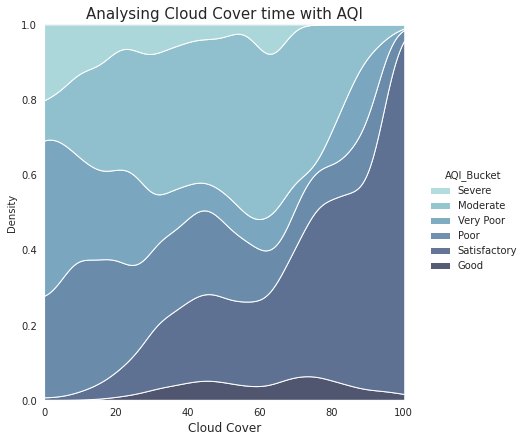

In [52]:
fig=sns.displot(
    data=merged_df_Delhi,
    x="cloudcover", hue="AQI_Bucket",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",);
fig.axes[0,0].set_title("Analysing Cloud Cover time with AQI",fontsize=15)
fig.axes[0,0].set_xlabel('Cloud Cover',size=12);

- We get some evidence that higher the cloud cover better would be the air quality.

<b> The above analysis is done for Delhi it can be done for other cities as well using same functions. Good research work can be done following this project layout (all functions defined and the way they are organised) </b>

# Summary
- Intensive analysis has been successfully done using pollution datasets.
- Pollution data was compared with different weather parameters. 
- Pollution data was compared with different demographic parameters. <br>
<b>The results found from the our analysis are consistent with the [Scientific Theories and Explanation](https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality) </b>

## Major Inferences
Concluding all inferences that were made through this analysis. But one must go through all inferences made along with the above analysis. to get full knowledge and insights <br>
><b>For Pollution Data</b>
1. There were a number of missing values for different pollutants that too for continuous and long periods of time. Due to this our analysis credibility may be affected.
2. Air quality is very poor in winters (from November to January) and is best in summers (June to September). Trend almost same for all years
3. Most of the pollutants show a "U" curve trend throughout the year.
4. Pollution is increasing every year. But year 2020 shows huge improvement in Air Quality (which is probably due to Lockdown).
5. Ahemdabad, Delhi, Patna are the most polluted cities based on the data whereas Aizwal is least polluted.
6. Hourly pollution trend in winters follows a mild U curve biased towards right with minima occurring around 6-7 pm. Whereas this trend remains stable or very mildly wavy in Summers.
7. PM 10 , PM 2.5 and CO tend to have most impact on overall AQI
8. NO values for winter months exhibit huge standard deviations whereas deviation is quite low for summer or mid year months. NO levels are maximum between November to January and minimum between June to September. Cities which rank highest on NO pollution comparison for different years are Delhi, Ahemdabad and Lucknow.



> <b>Pollution - Compared with Demography data  </b><br>

9. Pollution is found to be inversely proportional to sex ratio, literacy rate, %age total graduates for the city. Delhi shows a very exceptional trend.

> **Weather - Pollution Comparison Analysis (For Delhi)**<br>

10. For Delhi it is found that air quality is never good or satisfactory during lower humidity days and their count is biased towards higher levels humidity.
11.  Higher wind speed accompanied with higher humidity , better the air quality
12.  High humidity accompanied by moderate temperature (between 30-35 Degree C) has better air quality
13.  Better air quality is found on days with higher precipitation. This might be probably due to [Wet Deposition](https://blog.breezometer.com/air-pollution-weather-rainy-day)
14.  Lower the pressure better the air quality
15.  Probability of having better air quality is more when Sun Hours are around 12 to 14, whereas days with 8-10 sun hours tend to have lower air quality
16. We get some evidence that higher the cloud cover better would be the air quality.


## Some Intersting Questions Answered in the Above Analysis:
**QUESTION - 1 :** Is there any common pattern followed by most pollutants?<br>
**QUESTION - 2 :** What's the effect of 2020 Lockdown?<br>
**QUESTION - 3 :** Which are the most and least polluted cities?<br> 
**QUESTION - 4 :** What time of day can we generally expect to have best or most poor air quality ?<br>
**QUESTION - 5 :** How the Air Quality is affected by different Demographic parameters?<br>
**QUESTION - 6 :** How are wind speed and humidity related to Air Quality?<br>
**QUESTION - 7 :** Why is Air Quality better in summers than Winters?<br>
**QUESTION - 8 :** If number of sun hours for a day are forecasted to be 13, what kind of air Quality can we expect?

## Applications of the above code and Analysis Methodology
- Deep Analysis can be done for every pollutant separately.
- Deep Analysis can be done for different cities.
- Deep Analysis can be done for different years.

## Limitations
We do have lmitations in our datasets
- Lots of missing data in Pollution dataset
- The demography dataset used in based on 2011 census of India but we have pollution data for years 2015 to 2020. So, There's chance that comparison with demography may not be showing much accurate results. It would have been better if we had yearly data or census for 2019 data, we could get much accurate results.
- Also Demography Data is not much detailed lacks values for many important parameters.

# References
- https://pandas.pydata.org
- https://numpy.org/
- https://matplotlib.org/
- http://seaborn.pydata.org/
- https://plotly.com/python
- https://github.com/ResidentMario/missingno
- https://www.tceq.texas.gov/airquality/sip/criteria-pollutants
- https://www.lung.org/clean-air/outdoors/what-makes-air-unhealthy/ozone
- https://emergency.cdc.gov/agent
- https://www.qld.gov.au/environment/management/monitoring/air/air-pollution/pollutants/toxics
- https://swachhindia.ndtv.com/air-pollution-what-is-air-quality-index-how-is-it-measured-and-its-health-impact-40387
- https://en.wikipedia.org/wiki/Demography
- https://www.nature.com/scitable/knowledge/library/introduction-to-population-demographics-83032908/
- https://www.investopedia.com/terms/d/demographics.asp
- https://solarset.com/
- https://blog.breezometer.com/air-pollution-weather-rainy-day
- https://en.wikipedia.org/wiki/Humidity
- https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality 
- https://education.nationalgeographic.org/resource/cloud-cover